
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from the Movie Database (TMDb). It includes information such as movie  user ratings, budgets, genres, revenue, release year,  and many other relevant information. It contains 10866 rows and 21 columns.


### Question(s) for Analysis
>In this project, I will be carrying out analysis to answer the following questions about the TMDb movie date set

> 1. what year generated the highest revenue
> 2. which movie genre has the highest production  cost
> 3. which genre have the highest number of movies
> 4. Relationship between budget and revenue
> 5. relationship between vote count and popularity


In [1]:
# installing the  python packages I will be  using for my analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of my project , I be will be  loading and assessing  my data, to check for cleanliness, and then trim and clean my data to ensure ubiased and error free analysis.

> I will be checking for errors  like duplicates, null values, data types, the statistical summary and lots more.  




In [2]:
# load my data and check the first few rows for inspection

df = pd.read_csv('movies_data.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# inspecting the last few rows

df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# to check the number of rows and columns of the data frame

df.shape

(10866, 21)

In [5]:
# to know the summary of the descriptive statistics

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# to check for the number of duplicates

sum(df.duplicated())

1

In [7]:
# to check the count of data, null values and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
# to know the total number of null values in each column of my data set

df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# to check for number of rows containing zero value in the revenue and budget column

budget_with_0_value = df.loc[(df['budget'] == 0)]

revenue_with_0_value = df.loc[(df['revenue'] == 0)]

# to return the respective number of rows

budget_with_0_value.shape[0], revenue_with_0_value.shape[0]

(5696, 6016)


### Data Cleaning
 > After carefully inspecting and  assessing my data, I discovered the following ;
 1. one duplcate value
 2. so many null values are present in some columns
 3. some values are 0 in the revenue and budget column
 4. the release date is a string and  not in the date-time format
 5. My genres column contains multiple genres for each movie seperated by '|'
 6. some columns are not required to answer the questions for my analysis
 
 > In this session of my project, I will be addressing and fixing the mentioned errors assosiated with my TMDB data set inorder to ensure an error free analysis. I will be performing the following in my data set;
 1. droping some columns thet are not required to answer my questions
 2. droping duplicates
 3. change the release date from a string  to date-time format
 4. spliting the genre column to get the first genre as the main genre of the movie. This is beacause Aftter carefully reading some of the movie documentation the first genre describes the movie more.
 5. droping null values.
 6. droping the 0 values in the revenue and budget columns.


In [10]:
# drop some columns that are not required for the analysis

df.drop(['imdb_id','budget_adj', 'cast', 'homepage', 'tagline', 'keywords', 'revenue_adj', 'vote_average', 'overview'], axis=1, inplace= True)

# confirm if the changes was effective
df

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,2015
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,2015
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,2015
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,2015


In [11]:
# drop rows with '0' value in the revenue and budget column, so as to make the result of my analysis more accurate

df = df[(df.budget != 0) & (df.revenue != 0)]

# confirm if the changes was effective

print('0' in df['budget']) 
print('0' in df['revenue'])


False
False


In [12]:
# confirm the number of rows and columns after dropng the 0 values

df.shape

(3855, 12)

In [13]:
# drop the duplicate found in the data set

df.drop_duplicates(inplace = True)

# to confirm if the change takes place

sum(df.duplicated())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [14]:
# to drop the null values in the dataframe

df.dropna(inplace = True)

# to confirm if there is null value

df.isnull().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
release_year            0
dtype: int64

In [15]:
# spliting the genres column to get the first genre

df['genres'] = df['genres'].str.split('|').str.get(0)

df.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015


In [16]:
# changing the release date from string to date time format

df['release_date'] = pd.to_datetime(df['release_date'])

# to check if the release date is now in the date time format

df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 12 columns):
id                      3807 non-null int64
popularity              3807 non-null float64
budget                  3807 non-null int64
revenue                 3807 non-null int64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null int64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null datetime64[ns]
vote_count              3807 non-null int64
release_year            3807 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 386.6+ KB


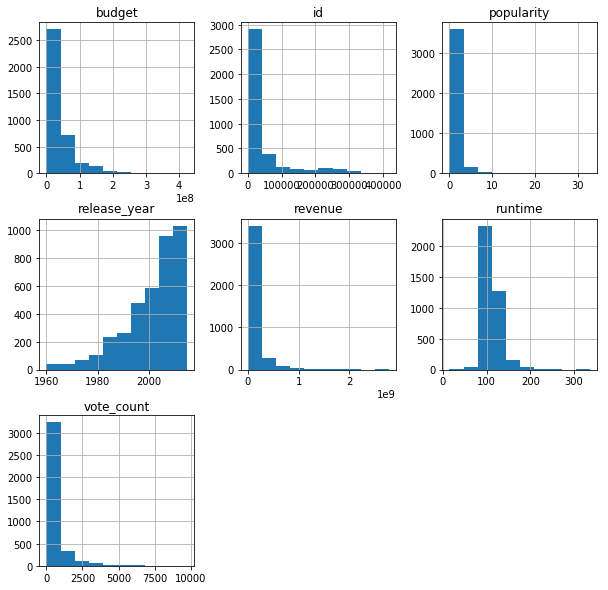

In [17]:
# assessing my data by checking the iformation and using histogram histogram

df.info()
df.hist(figsize=(10,10));

<a id='eda'></a>
## Exploratory Data Analysis
In this session I will be visualising  the cleaned data in order to find pattern, discover trends and relationships between variables inorder to gain insight and  answer my reaserch questions

### Research Question 1 (What year was the highest revenue genrated!)

Text(0,0.5,'Average revenue')

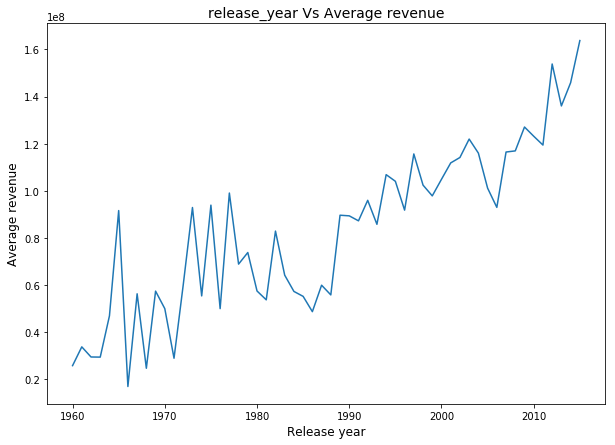

In [18]:
df.groupby('release_year')['revenue'].mean().plot(x = 'release_year', y = 'revenue', figsize = (10,7))
plt.title("release_year Vs Average revenue",fontsize = 14)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Average revenue',fontsize = 12)


#### from the above plot, It appears that the highest revenue generated was in 2015, the revenue increase  yearly and there is a rapid increase in revenue in 1965 which droped significantly in 1966 and the continue to fluctuate over time

In [19]:
def plotchart(title,xlabel,ylabel,values,column_name):
    values.plot(x = column_name, kind = 'barh',figsize = (10,7));
    plt.title(title,fontsize = 14)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)

### Research Question 2  (which movie genre has the highest production  cost)

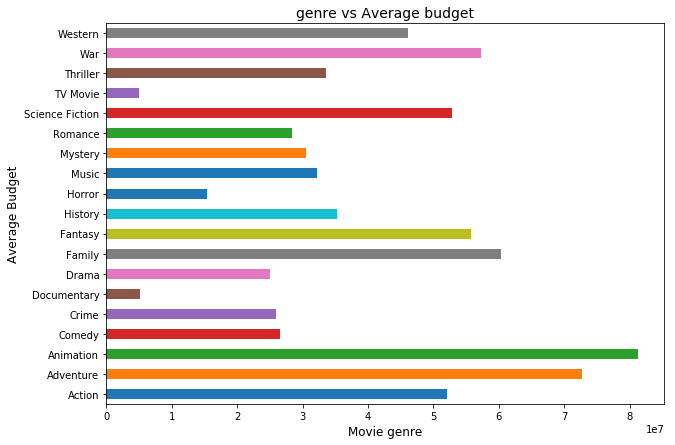

In [27]:
val = df.groupby('genres')['budget'].mean()
plotchart('genre vs Average budget','Movie genre','Average Budget',val,'genres')

#### it is clear that the production cost of animation movie is  high compare to TV movies with the lowest production cost

## Research Question 3:  (which genre has the highest number of movie)

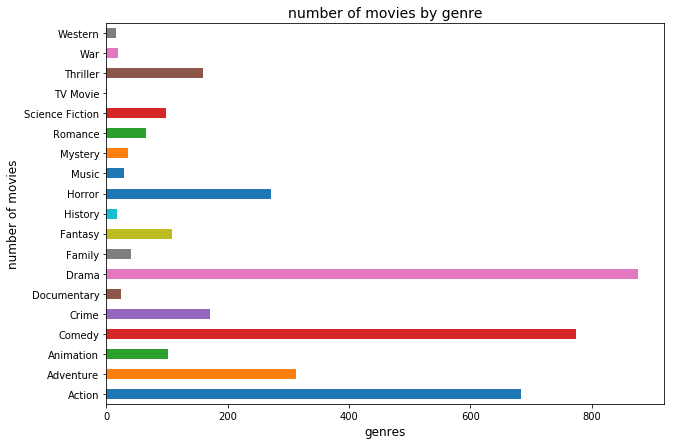

In [21]:
val2 = df.groupby('genres')['id'].count()
plotchart('number of movies by genre','genres','number of movies',val2,'genres')

#### in the above chart, it is clear that dramma movies are more produced and Tv movies are the list produced

## Research Question 4: Relationship between budget and Revenue

Text(0.5,1,'Relationship Between Budget And Revenue')

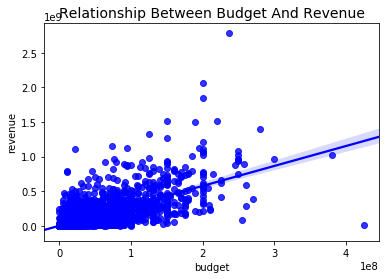

In [22]:
sns.regplot(x=df['budget'], y=df['revenue'], color='blue')
plt.title("Relationship Between Budget And Revenue",fontsize = 14)


#### from the above plot, the is a positive correlation between the bufget and revenue. The both variables are directly conected to each other

## Research Question5: Relationship between popularity and vote count 

Text(0.5,1,'Relationship Between Popularity And Vote Count')

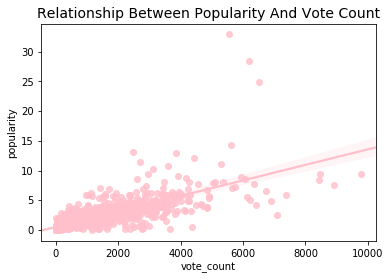

In [23]:
sns.regplot(x=df['vote_count'], y=df['popularity'],color='pink')
plt.title("Relationship Between Popularity And Vote Count",fontsize = 14)


#### porpularity and vote count also showed a similar relationship like budget and revenue. The more popular a movie is the the votes it get

<a id='conclusions'></a>
## Conclusions

> After carefully carrying out my analysis of the TMDb dataset, the foolowing finding was made

>1. The highest revenue was generated in 2015. 
>2. producing animation movies has the highest budget cost
>3. Over the years drama movies are more produced and Tv movies are least produced
>4. There is a strong positive relationship between budget and revenue. The more the budget cost of a movie the more revenue it     generated
>5. there is also a positive relationship between vote count and popularitiy. The vote count increases as the popularity increase




## Limitations

> This data set was large enough to answer the questions abiut the TMDb movie data set but more than 50% of the data sample was droped due to high number of null values and 0 entries in both budget and revenue column, and this I consider a major set back in the course of my analysis.

> The genre column contains multiple genre for each movie seperated by '|', which I had to split and extract the first genre in order to make my analysis more effective.

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0